In [1]:
import torch, numpy as np, matplotlib.pyplot as plt, torch.nn as nn, torch.nn.functional as F, torch.autograd.profiler as profiler
from poly_learner import PolyLearner

## Learning a polynomial

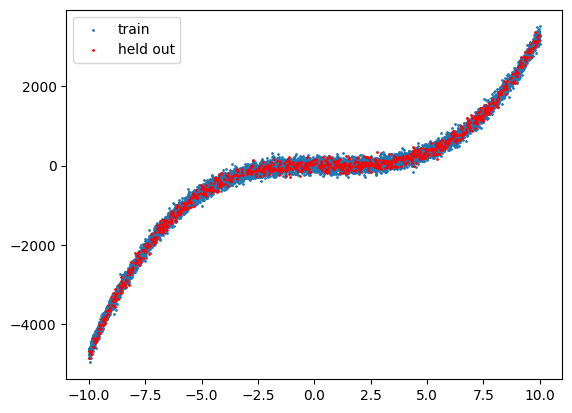

In [2]:
# constructing a simple dataset of a cubic polynomial

num_points = 10000

d = 4
a = 7
b = 2
c = 3

x = np.linspace(-10, 10, num_points)
y =  d* x**3 - a * x**2 + b * x + c + np.random.normal(0, 100, num_points)
x = torch.tensor(x).to(torch.float32).reshape(-1,1)
y = torch.tensor(y).to(torch.float32).reshape(-1,1)

# split the data into training, validation and held out sets

train_val_split = 0.8 
val_held_split = 0.5

indices = torch.randperm(len(x))
x = x[indices]
y = y[indices]


train_x = x[:int(len(x)*train_val_split)]
train_y = y[:int(len(y)*train_val_split)]

val_x = x[int(len(x)*train_val_split):]
val_y = y[int(len(y)*train_val_split):]

held_x = val_x[:int(len(val_x)*val_held_split)]
held_y = val_y[:int(len(val_y)*val_held_split)]

plt.scatter(train_x, train_y, s=1, label='train');
plt.scatter(held_x, held_y, s=1, c='red', label='held out')
plt.legend();

In [3]:
clf = PolyLearner(1, 1, 1, device='cpu', dtype=torch.float32)
clf.fit(train_x, train_y, val_x=val_x, val_y=val_y, epochs=10000, lr=0.01, batch_size=512, patience=10, verbose=True)

Using device: cpu
Epoch 1, Loss: 2213537.6875, Val Loss: 1703876.8750
Epoch 2, Loss: 1042989.7461, Val Loss: 461892.6875
Epoch 3, Loss: 464833.9902, Val Loss: 403992.4062
Epoch 4, Loss: 399590.5039, Val Loss: 375707.4375
Epoch 5, Loss: 373695.7305, Val Loss: 354140.5625
Epoch 6, Loss: 349903.3652, Val Loss: 329969.2500
Epoch 7, Loss: 324570.6445, Val Loss: 303411.7500
Epoch 8, Loss: 295902.4414, Val Loss: 274258.9375
Epoch 9, Loss: 264279.3311, Val Loss: 242055.9688
Epoch 10, Loss: 227819.8740, Val Loss: 203133.7031
Epoch 11, Loss: 187711.4434, Val Loss: 164137.0469
Epoch 12, Loss: 148270.2305, Val Loss: 127540.7266
Epoch 13, Loss: 115001.7378, Val Loss: 98485.9844
Epoch 14, Loss: 86957.3989, Val Loss: 75013.4531
Epoch 15, Loss: 67985.5398, Val Loss: 60274.8203
Epoch 16, Loss: 53724.4868, Val Loss: 47479.0508
Epoch 17, Loss: 42652.0042, Val Loss: 37823.4102
Epoch 18, Loss: 34580.6339, Val Loss: 30857.3242
Epoch 19, Loss: 28513.8826, Val Loss: 26269.9082
Epoch 20, Loss: 25154.0983, Val 

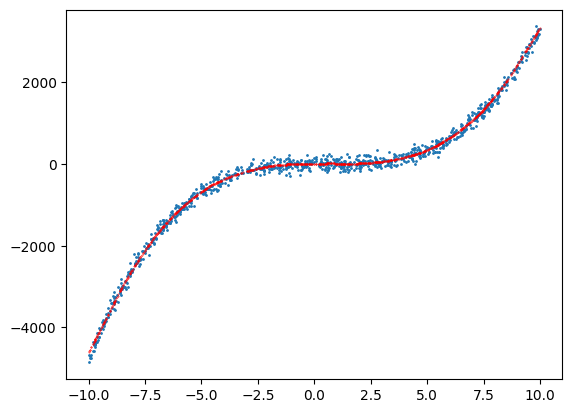

In [5]:
plt.scatter(held_x, held_y, label='Original data', s=1)
plt.scatter(held_x, clf.predict(held_x), color='red',s=0.1,label='Fitted line');

In [6]:
clf.co()

array([[-8.4759140e-01, -1.3746120e-03, -7.6337451e-01,  8.2882851e-02,
        -6.8948694e-02, -8.5428488e-03,  9.9113673e-01, -7.9486921e-02,
         1.0307801e+00,  5.9881937e-03,  2.7335847e-03, -5.3204902e-02,
        -6.5987825e-01, -7.2064728e-01, -1.4051329e-02,  4.2441860e-02,
         5.5014722e-02, -6.9180363e-01,  1.1950885e+00,  1.0375125e+00,
         5.4407620e-01, -6.6468942e-01, -3.9302285e+00, -6.8967199e-01,
        -6.8544596e-01, -6.9342327e-01, -7.2996519e-03,  9.1914511e-01,
         3.8871180e-02,  5.6267798e-01, -6.8356860e-01,  2.5213094e-02,
         2.5720486e-02,  1.0678428e+00, -6.8632674e-01,  3.2010805e-02,
        -7.8235008e-02,  1.0558063e+00,  5.9534037e-01,  2.1002106e-02,
         6.1721671e-01,  5.6492358e-01,  1.0948688e+00, -2.8603882e-02,
         5.6696296e-01, -6.5561873e-01, -7.0352632e-01, -6.8097946e-04,
        -6.6795242e-01, -4.1291114e-02,  5.6670092e-02, -6.8937212e-01,
        -4.3767509e+00,  1.1263386e+00, -6.6681254e-01,  2.71984